# King County House Price Prediction

## 1 Overview

For this project, I have used various regression methods to predict the price of houses in the northwestern county,USA. The models start with a very basic simple linear regression advancing towards a complex polynomial regression. The main aim here is to attain a model that will best predict the price of a house with a metric error close to zero.

## 2 Business Understanding
### 2.1 Understanding the Problem

Houses are slowly becoming the biggest investment one can make. The newest form of housing investment is the one where investors are now remodeling houses by improving particular features of the house with the goal of increasing its market value. To get a maximum return on investment, these investors ought to know which features of a house increase its value. 

### 2.1 Problem Statement

The main problem that investors willing to get into the housing market face is understanding the key factors that affect house prices.

## 3 Data Understanding

The dataset used in this analysis is the KC housing data set which contains data for 21597 properties in King County and 21 variables.It was obtained from Kaggle which is a google llc subsidiary an online community for data scientist.It allows users to find and publish realible data sets.

#### Load Necessary Modules

In [5]:
# For numerical operations
import numpy as np
# For data manipulation
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# To ignore future warnings
import warnings
warnings.filterwarnings('ignore')
# For linear regression
from sklearn import linear_model
# For model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#### Loading Data

In [6]:
# importing data
data = pd.read_csv("C:\\Users\\User-PC\\House_Sale_Prediction\\phase_2_project\\King_County_House_Sales_Prediction-\\kc_house_data.csv")
# Displaying the first 5 rows
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### 3.1 General Data Overview

In [7]:
# Number of rows and columns
data.shape

(21597, 21)

The data contains a total of 21597 rows and 21 columns. 

In [8]:
# Data type info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The data has both intergers(numerical) and object data types. However,sqft_basement(Square footage of the basement) is in object data types yet it is a measurement. 

In [9]:
# Statistical Summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
sqft_above,21597.0,1.788597e+03,8.277598e+02,3.700000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
yr_built,21597.0,1.971000e+03,2.937523e+01,1.900000e+03,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03
yr_renovated,17755.0,8.363678e+01,3.999464e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03


The statistical summary gives an overview of what each numerical column contains including the number of items(count),max(maximum value),the mean,standard deviation,25th,50th and 75th percentiles.

In [10]:
# Relationship between Variables
#fig = plt.figure(figsize = (20,20))
#sns.pairplot(data);
    

In [11]:
# Checking missing values
missing = data.isna().sum()
missing.sort_values(ascending = False)

yr_renovated     3842
waterfront       2376
view               63
id                  0
sqft_above          0
sqft_living15       0
long                0
lat                 0
zipcode             0
yr_built            0
sqft_basement       0
condition           0
grade               0
date                0
floors              0
sqft_lot            0
sqft_living         0
bathrooms           0
bedrooms            0
price               0
sqft_lot15          0
dtype: int64

In [12]:
# Percentage of missing values
per_missing_data = missing*100/len(data)
per_missing_data =per_missing_data.sort_values(ascending = False).head(3)
per_missing_data

yr_renovated    17.789508
waterfront      11.001528
view             0.291707
dtype: float64

Approximately 28.9% of the data is missing.

In [13]:
# Check for duplicates
dup_data = data.duplicated().any()
dup_data 

False

Data had no duplicates

### 4. Data Preparation
#### 4.1 Data Cleaning

Change the sqft_basement datatype from object to float.

In [14]:
# Check for placeholders
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [15]:
# Removing the placeholder
data['sqft_basement'].replace({"?":0}, inplace=True)
# Change sqft_basement datatype
data['sqft_basement'] = data['sqft_basement'].astype(float)


In [16]:
data['sqft_basement'].replace({0:data['sqft_basement'].median()}, inplace=True)

In [17]:
# Numerical Variables
num_col = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above',
             'sqft_basement','yr_built','yr_renovated',
             'zipcode','lat','long','sqft_living15','sqft_lot15','price']
data[num_col]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,360000.0
21593,4,2.50,2310,5813,2.0,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,400000.0
21594,2,0.75,1020,1350,2.0,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,402101.0
21595,3,2.50,1600,2388,2.0,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,400000.0


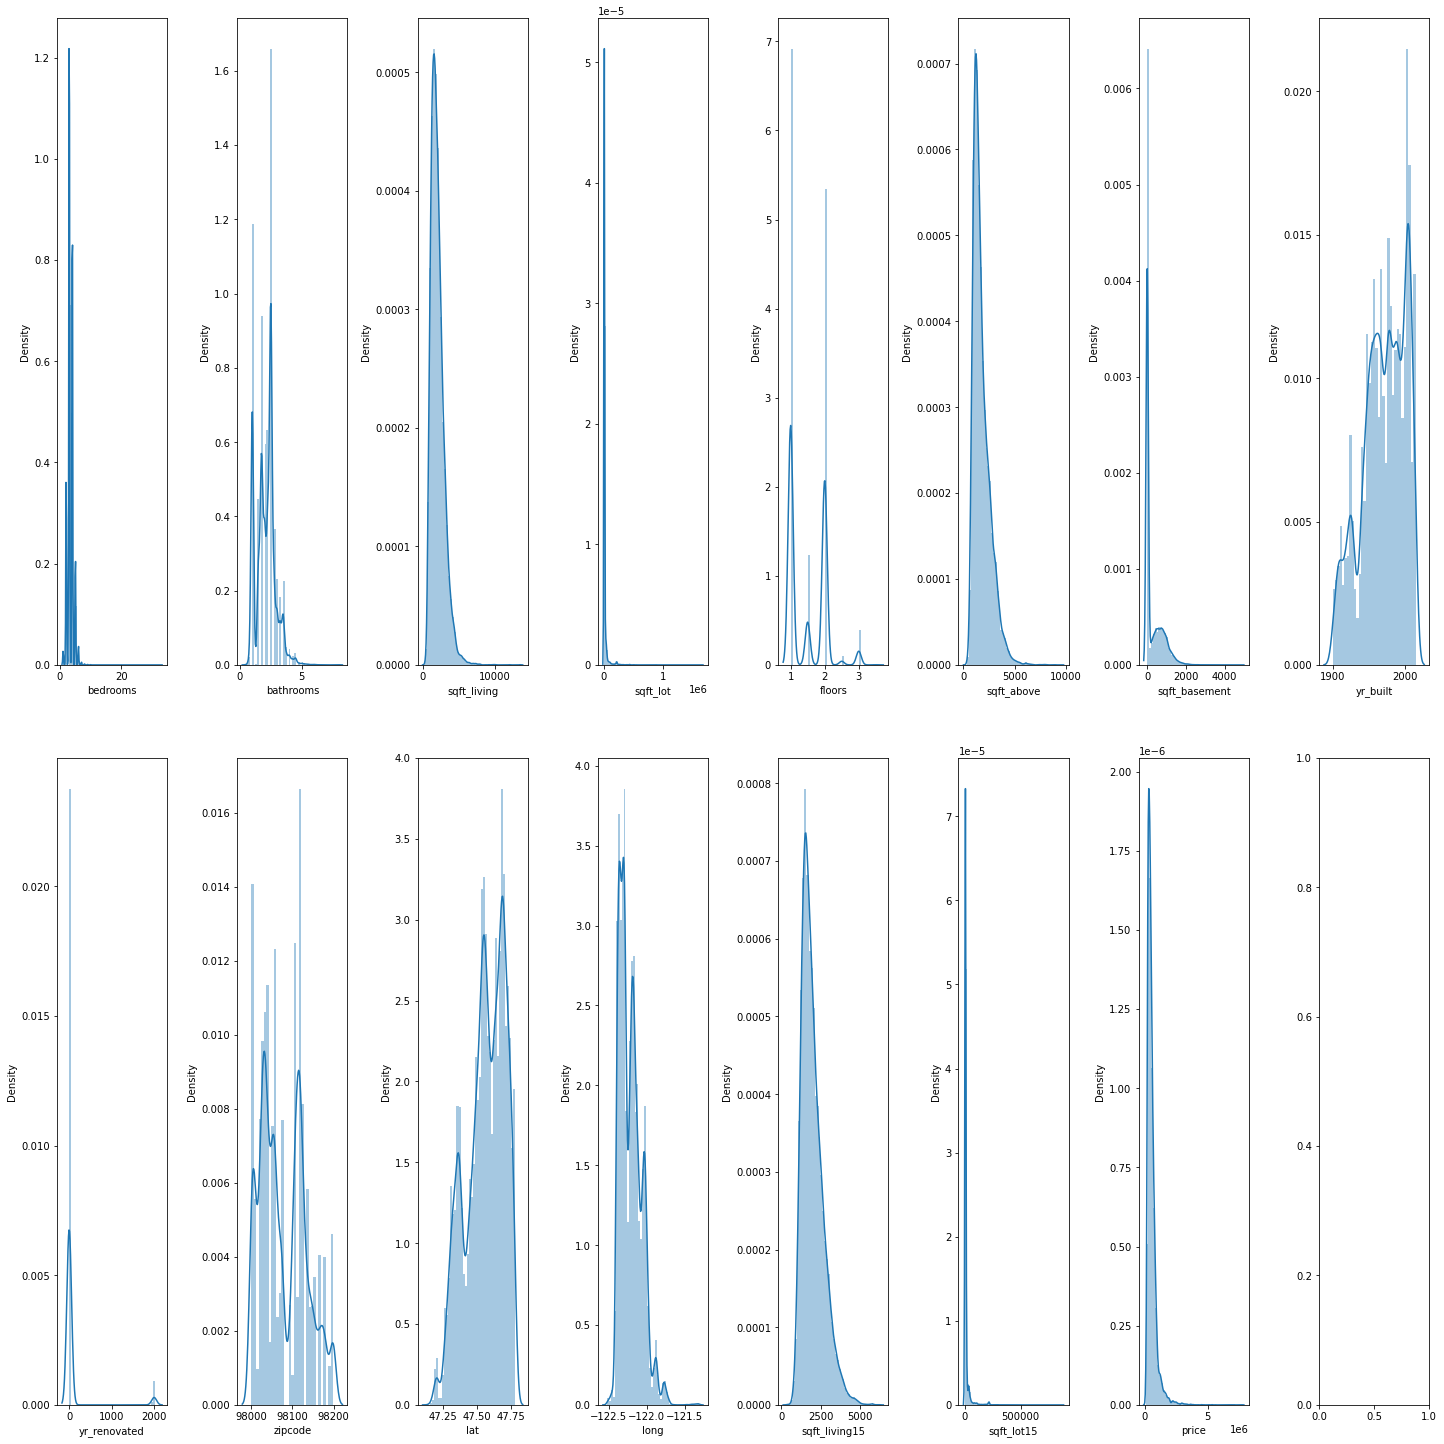

In [18]:
# Check the distribution to decide how best to deal with missing values
fig,ax = plt.subplots(ncols=8,nrows = 2,figsize = (20,20))
index = 0 
ax = ax.flatten()
for col,value in data[num_col].items():
    sns.distplot(value,ax = ax[index])
    index += 1
plt.tight_layout(pad= 0.5,w_pad= 0.7,h_pad=5.0);

'sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15','price' have very big scales that will need to be transformed.

In [19]:
# Dealing with missing values
data['yr_renovated'].fillna(data['yr_renovated'].median(), inplace = True)
data['waterfront'].fillna(data['waterfront'].mode()[0], inplace = True)
data['view'].fillna(data['view'].mode()[0], inplace = True)
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

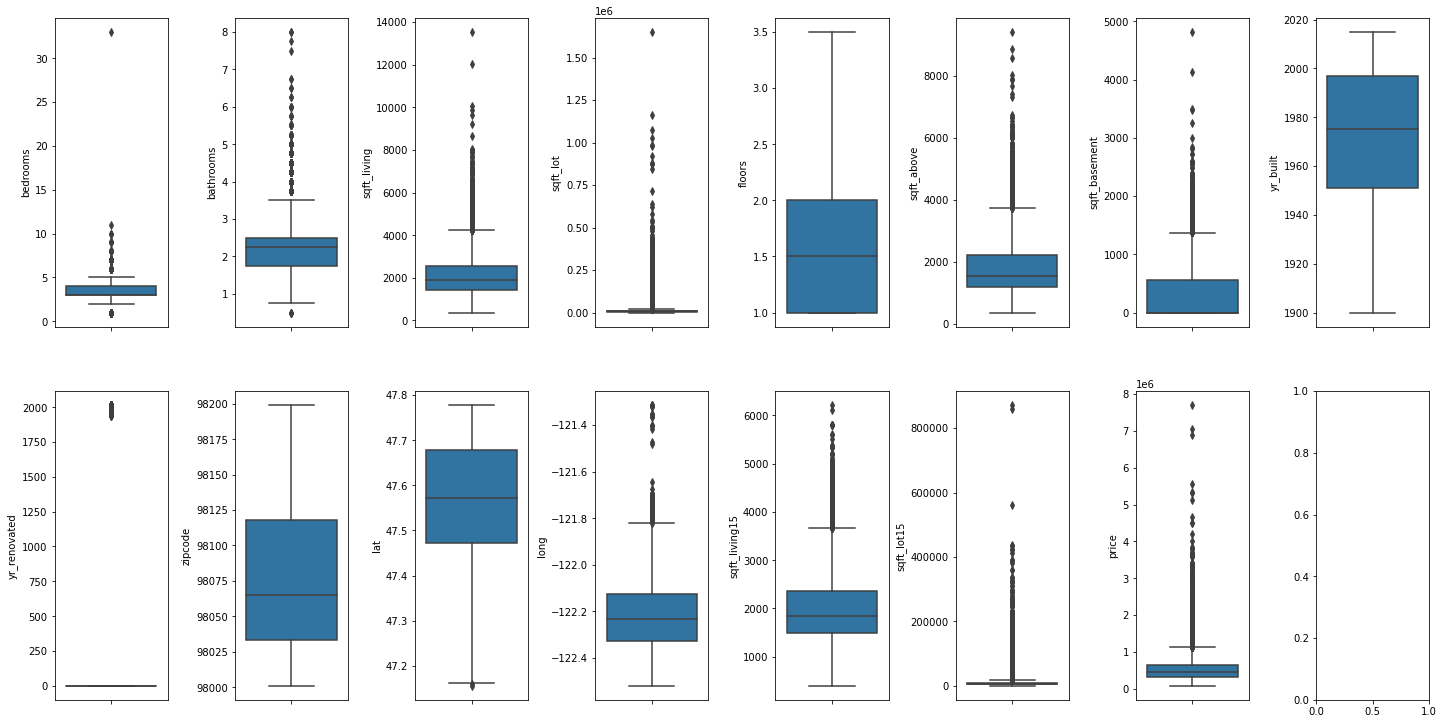

In [20]:
# Visualise Outliers using boxplots
#num_log=['log_sqft_living','log_sqft_lot','log_sqft_above','log_sqft_living15','log_sqft_lot15','log_price','bedrooms','bathrooms','floors','sqft_basement','yr_built','yr_renovated',
                                #'zipcode','lat','long']
fig,ax = plt.subplots(ncols=8,nrows =2,figsize = (20,10))
index = 0 
ax = ax.flatten()
for col,value in data[num_col].items():
    sns.boxplot(y = col,data = data[num_col],ax = ax[index])
    index += 1
plt.tight_layout(pad= 0.5,w_pad= 0.7,h_pad=5.0);

#### 3.2 Feature Engineering

In [21]:
# Change categorical variables into dummy variables
data= pd.get_dummies(data,columns = ['waterfront','view','condition','grade'],drop_first=True)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,1180,0.0,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,2170,400.0,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,770,0.0,...,0,0,0,0,0,0,1,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,1050,910.0,...,0,0,0,0,0,0,0,1,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,1680,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,1530,0.0,...,0,0,0,0,0,0,0,0,1,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,2310,0.0,...,0,0,0,0,0,0,0,0,1,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,1020,0.0,...,0,0,0,0,0,0,0,1,0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,1600,0.0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
# Dropping unnecessary features in the numeric features
data.drop(['id','date'],axis=1,inplace=True)


#### Log Transformation

In [23]:
# list the varibles with big scales
log_var = ['log_sqft_living','log_sqft_lot','log_sqft_above','log_sqft_living15','log_sqft_lot15']
#log transform to get a better scale
data_copy = data.copy()
data_copy[log_var] = np.log(data[['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15']])
data_copy.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,log_sqft_living,log_sqft_lot,log_sqft_above,log_sqft_living15,log_sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,...,0,0,1,0,0,7.073270,8.639411,7.073270,7.200425,8.639411
1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,...,0,0,1,0,0,7.851661,8.887653,7.682482,7.432484,8.941022
2,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,0.0,...,0,1,0,0,0,6.646391,9.210340,6.646391,7.908387,8.994917
3,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,...,0,0,1,0,0,7.580700,8.517193,6.956545,7.215240,8.517193
4,510000.0,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,...,0,0,0,1,0,7.426549,8.997147,7.426549,7.495542,8.923058


In [24]:
data_copy.drop(['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15'],axis=1,inplace=True)
data_copy.head()

,price,bedrooms,bathrooms,floors,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,...,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,log_sqft_living,log_sqft_lot,log_sqft_above,log_sqft_living15,log_sqft_lot15
0,221900.0,3,1.00,1.0,0.0,1955,0.0,98178,47.5112,-122.257,...,0,0,1,0,0,7.073270,8.639411,7.073270,7.200425,8.639411
1,538000.0,3,2.25,2.0,400.0,1951,1991.0,98125,47.7210,-122.319,...,0,0,1,0,0,7.851661,8.887653,7.682482,7.432484,8.941022
2,180000.0,2,1.00,1.0,0.0,1933,0.0,98028,47.7379,-122.233,...,0,1,0,0,0,6.646391,9.210340,6.646391,7.908387,8.994917
3,604000.0,4,3.00,1.0,910.0,1965,0.0,98136,47.5208,-122.393,...,0,0,1,0,0,7.580700,8.517193,6.956545,7.215240,8.517193
4,510000.0,3,2.00,1.0,0.0,1987,0.0,98074,47.6168,-122.045,...,0,0,0,1,0,7.426549,8.997147,7.426549,7.495542,8.923058


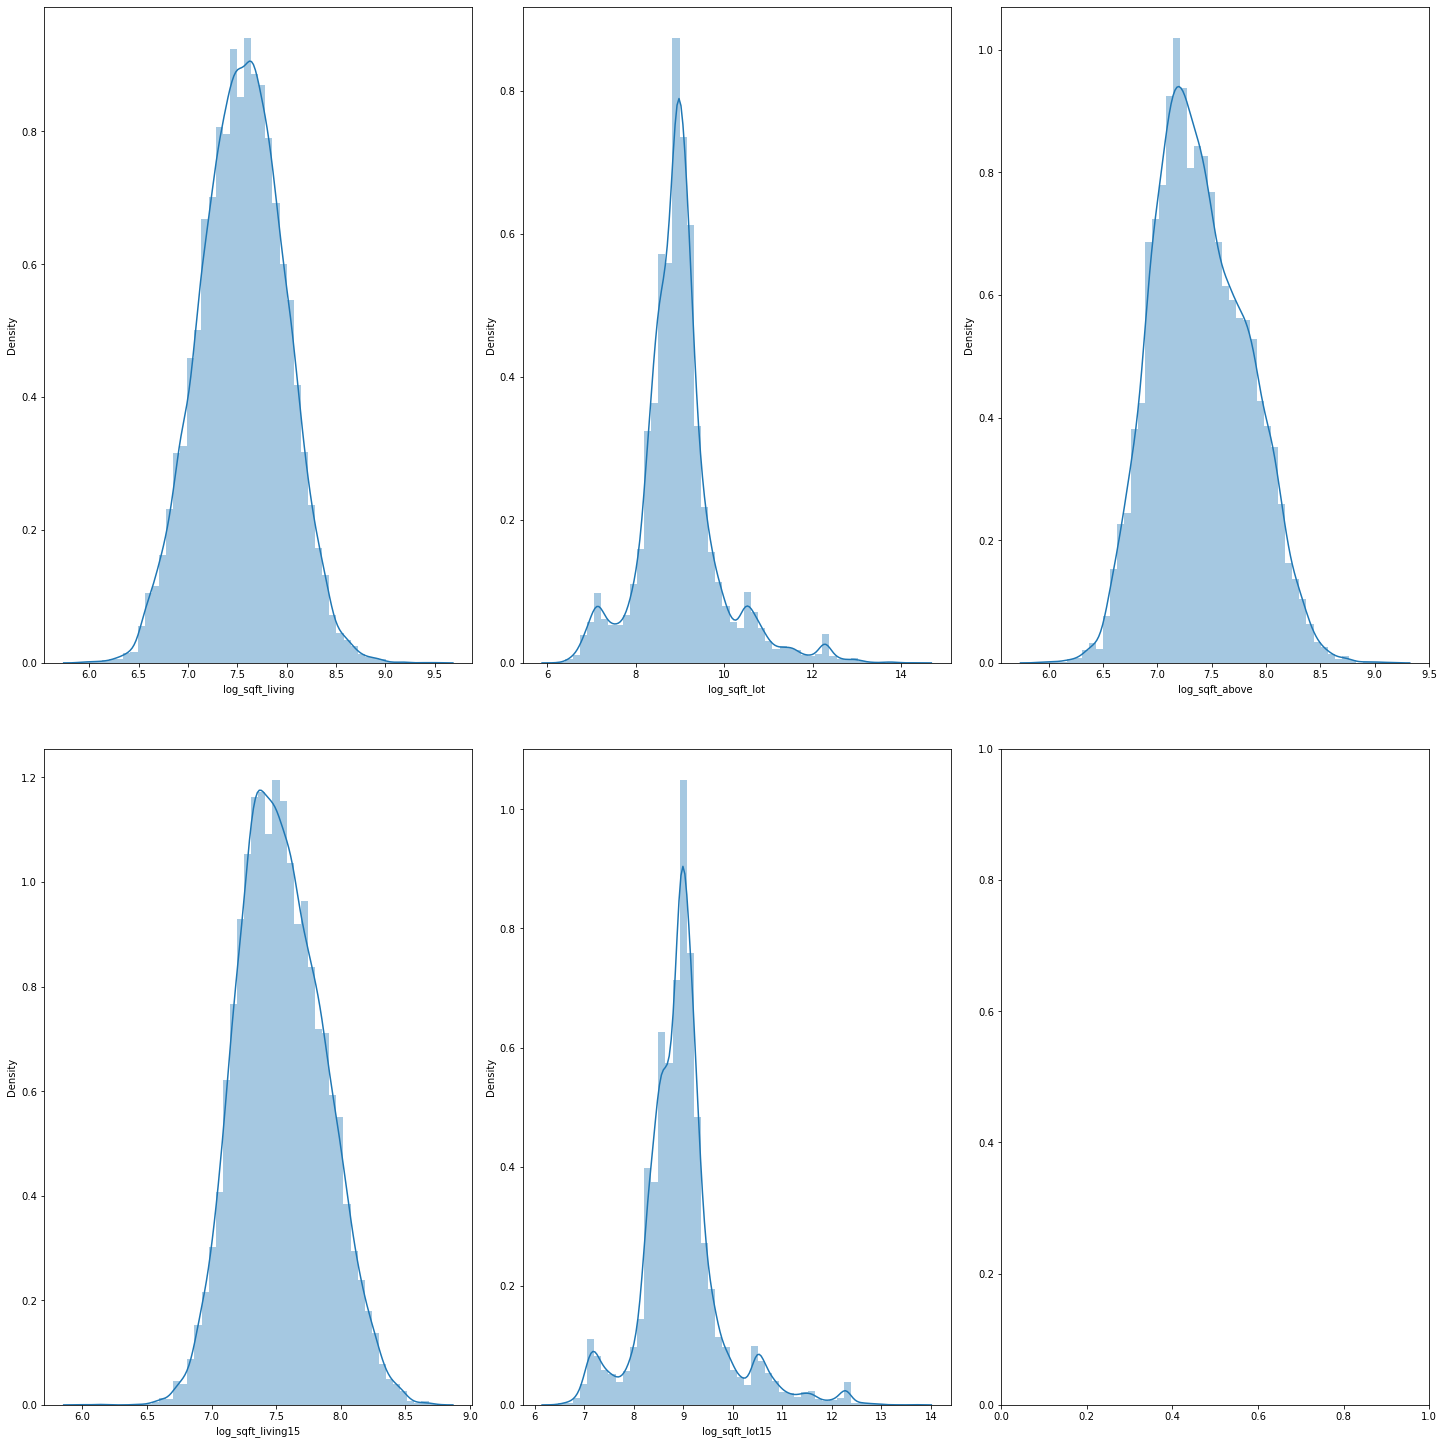

In [25]:
fig,ax = plt.subplots(ncols=3,nrows = 2,figsize = (20,20))
index = 0 
ax = ax.flatten()
for col,value in data_copy[log_var].items():
    sns.distplot(value,ax = ax[index])
    index += 1
plt.tight_layout(pad= 0.5,w_pad= 0.7,h_pad=5.0);

In [26]:
data_copy_2 = data.copy() 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(data_copy_2)
scaled = pd.DataFrame(scaled,columns = data_copy_2.columns)
scaled.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,-0.866716,-0.402903,-1.451073,-0.980652,-0.228182,-0.915552,-0.735251,-0.649637,-0.544678,-0.188881,...,-0.137195,-0.064327,-0.024542,-0.006805,-0.03538,-0.106453,-0.322796,1.186010,-0.624887,-0.371163
1,-0.006252,-0.402903,0.174486,0.533369,-0.189739,0.937431,0.460776,0.259847,-0.680850,5.280462,...,-0.137195,-0.064327,-0.024542,-0.006805,-0.03538,-0.106453,-0.322796,1.186010,-0.624887,-0.371163
2,-0.980773,-1.482493,-1.451073,-1.427234,-0.123139,-0.915552,-1.230575,-0.649637,-1.293626,-0.188881,...,-0.137195,-0.064327,-0.024542,-0.006805,-0.03538,-0.106453,3.097927,-0.843163,-0.624887,-0.371163
3,0.173409,0.676687,1.149821,-0.131057,-0.243878,-0.915552,-0.892305,1.419440,-0.204247,-0.188881,...,-0.137195,-0.064327,-0.024542,-0.006805,-0.03538,-0.106453,-0.322796,1.186010,-0.624887,-0.371163
4,-0.082471,-0.402903,-0.150626,-0.436040,-0.169503,-0.915552,-0.131197,-0.649637,0.544700,-0.188881,...,-0.137195,-0.064327,-0.024542,-0.006805,-0.03538,-0.106453,-0.322796,-0.843163,1.600289,-0.371163


In [27]:
# Separating features from Target
y = data['price']
x = data.drop(['price'],axis=1)
print(y.shape)
print(x.shape)

(21597,)
(21597, 33)


In [28]:
# Splitting data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size= 0.2,random_state=45)
X_train.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
8933,4,2.5,2710,8127,2.0,2710,0.0,1994,0.0,98038,...,0,0,0,0,0,0,0,0,1,0
21075,4,2.5,3010,9000,2.0,3010,0.0,2008,0.0,98059,...,0,0,0,0,0,0,0,0,1,0
625,3,1.0,960,6400,1.0,820,140.0,1944,0.0,98178,...,0,0,0,0,0,0,1,0,0,0
9540,2,1.0,680,4190,1.0,680,0.0,1906,0.0,98103,...,0,0,0,0,0,1,0,0,0,0
18262,4,2.5,1980,5400,2.0,1980,0.0,1998,0.0,98056,...,0,0,0,0,0,0,0,0,1,0


### Modelling
#### 1 Build  Regression Models Before Transformation and Scaling
#### 1.1 Simple Linear Regression

In [29]:
data.corr()['price'].sort_values(ascending=False).head(5)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
Name: price, dtype: float64

In [30]:
# Setting Up Variables for Regression
y = y_train
X_baseline = X_train['sqft_living']

In [31]:
# fitting and creating a model
import statsmodels.api as sm
baseline_model = sm.OLS(y,sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 1.686e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:11:48   Log-Likelihood:            -2.4013e+05
No. Observations:               17277   AIC:                         4.803e+05
Df Residuals:                   17275   BIC:                         4.803e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.508e+04   4935.315     -9.135      0.000   -5.48e+04   -3.54e+04
sqft_living   281.8758      2.171    129.861      0.000     277.621     286.130
==============================================================================
Omnibus:                    11809.256   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           421006.354
Skew:                           2.816   Prob(JB):                         0.00
Kurtosis:                      26.519   Cond. No.                     5.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Result interpretation

The model is statistically significant overall, with an F-statistic p-value well below 0.05.
Our model explains about 49% of the variance in price, the dependent variable.
The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05
For a sqft_living of 0, our model would predict a price of about -0.0006052.
An increase of 1 in sqft_living is associated with an increase of about 290 in price.

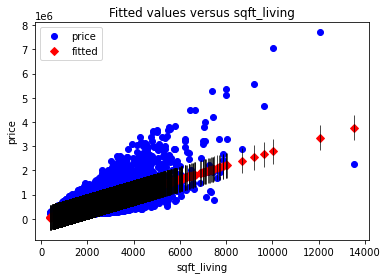

In [32]:
# plot the actual vs. predicted log values
sm.graphics.plot_fit(baseline_results , "sqft_living")
plt.show()

Most of the points lie outside the fitted line suggesting room for improvement.

In [33]:
# Prediction on Training Data
y_pred = baseline_results.predict(sm.add_constant(X_baseline))
mean_absolute_error(y, y_pred)
mean_squared_error(y, y_pred, squared=False)
print("MAE:", (mean_absolute_error(y, y_pred)))
print("RMSE:", (mean_squared_error(y, y_pred, squared=False)))

MAE: 174166.07791588307
RMSE: 263028.26492293196


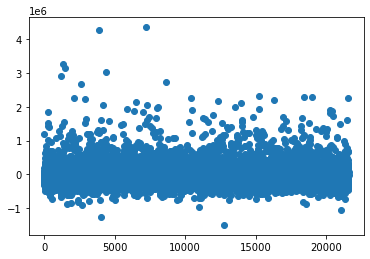

In [34]:
# Plotting the error
plt.plot((y_train-y_pred),marker='o',linestyle='');

From the graph most of the values have not been accurately predicted.

####  Multiple Linear Regression Model

Given that our simple linear regression is a poor fit,lets add more features to improve the model.

In [35]:
model = sm.OLS(y,sm.add_constant(X_train))
model_results = model.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     1425.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:11:50   Log-Likelihood:            -2.3465e+05
No. Observations:               17277   AIC:                         4.694e+05
Df Residuals:                   17243   BIC:                         4.696e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.478e+06   3.15e+06      2.372      0.018     1.3e+06    1.37e+07
bedrooms            -1.996e+04   2043.151     -9.767      0.000    -2.4e+04    -1.6e+04
bathrooms            4.432e+04   3498.805     12.668      0.000    3.75e+04    5.12e+04
sqft_living            95.1237     18.807      5.058      0.000      58.259     131.988
sqft_lot                0.1074      0.052      2.051      0.040       0.005       0.210
floors               2.725e+04   3902.314      6.984      0.000    1.96e+04    3.49e+04
sqft_above             41.4759     18.839      2.202      0.028       4.549      78.403
sqft_basement          39.1654     18.641      2.101      0.036       2.626      75.704
yr_built            -2213.3474     78.524    -28.187      0.000   -2367.262   -2059.432
yr_renovated           36.6439      4.273      8.576      0.000      28.269      45.019
zipcode              -582.9027     35.481    -16.429      0.000    -652.449    -513.356
lat                  6.154e+05   1.15e+04     53.427      0.000    5.93e+05    6.38e+05
long                -2.066e+05   1.41e+04    -14.650      0.000   -2.34e+05   -1.79e+05
sqft_living15          25.6199      3.723      6.881      0.000      18.322      32.918
sqft_lot15             -0.3978      0.081     -4.899      0.000      -0.557      -0.239
waterfront_YES       5.642e+05   2.14e+04     26.387      0.000    5.22e+05    6.06e+05
view_EXCELLENT       1.539e+05   1.62e+04      9.484      0.000    1.22e+05    1.86e+05
view_FAIR            4.342e+04   1.38e+04      3.138      0.002    1.63e+04    7.06e+04
view_GOOD            5.507e+04   1.18e+04      4.653      0.000    3.19e+04    7.83e+04
view_NONE           -7.777e+04   7321.040    -10.623      0.000   -9.21e+04   -6.34e+04
condition_Fair      -4558.2888   1.66e+04     -0.275      0.783    -3.7e+04    2.79e+04
condition_Good       3.004e+04   3714.561      8.087      0.000    2.28e+04    3.73e+04
condition_Poor      -5.588e+04   4.33e+04     -1.289      0.197   -1.41e+05    2.91e+04
condition_Very Good  7.176e+04   5970.013     12.020      0.000    6.01e+04    8.35e+04
grade_11 Excellent   2.429e+05   1.28e+04     18.920      0.000    2.18e+05    2.68e+05
grade_12 Luxury       7.22e+05   2.37e+04     30.400      0.000    6.75e+05    7.69e+05
grade_13 Mansion       1.9e+06   6.53e+04     29.093      0.000    1.77e+06    2.03e+06
grade_3 Poor        -2.224e+05   1.92e+05     -1.157      0.247   -5.99e+05    1.54e+05
grade_4 Low         -3.887e+05   4.79e+04     -8.118      0.000   -4.83e+05   -2.95e+05
grade_5 Fair        -4.044e+05   1.75e+04    -23.134      0.000   -4.39e+05    -3.7e+05
grade_6 Low Average -3.847e+05   1.11e+04    -34.795      0.000   -4.06e+05   -3.63e+05
grade_7 Average     -3.437e+05   9123.372    -37.672      0.000   -3.62e+05   -3.26e+05
gra

The model is statistically significant overall, with an F-statistic p-value well below 0.05. Our model explains about 73% of the variance in price, the dependent variable. Most of the model coefficients are statistically significant with pvalues less than the standard 0.05 level of significance.

In [36]:
y_pred = model_results.predict(sm.add_constant(X_train))
mean_absolute_error(y, y_pred)
mean_squared_error(y, y_pred, squared=False)
print("MAE:", (mean_absolute_error(y, y_pred)))
print("RMSE:", (mean_squared_error(y, y_pred, squared=False)))

MAE: 119680.17340474062
RMSE: 191522.0389356171


A good model should have a very small metric error;the closer to zero the better but from our results our predicted value was off by MAE of 119680 down from our previous 174166. This is a better model but not the best.  

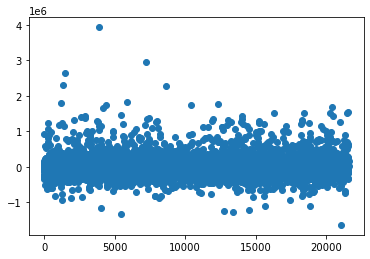

In [37]:
plt.plot((y-y_pred),marker='o',linestyle='');

lets try removing some of the features that are weakly correlated with price and see how the model behaves.

In [38]:
# Removing unnecessary features
set_1 = list(data.corr()[abs(data.corr()['price'])>0.3].index)
set_1.remove('price')
set_1

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_above',
 'sqft_basement',
 'lat',
 'sqft_living15',
 'view_EXCELLENT',
 'view_NONE',
 'grade_11 Excellent',
 'grade_7 Average']

In [39]:
# Creating and fitting the adjusted model
model_21 = sm.OLS(y,sm.add_constant(X_train[set_1]))
model_21results = model_21.fit()
model_21results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     2732.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:11:51   Log-Likelihood:            -2.3731e+05
No. Observations:               17277   AIC:                         4.746e+05
Df Residuals:                   17265   BIC:                         4.747e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.337e+07   5.91e+05    -56.438      0.000   -3.45e+07   -3.22e+07
bedrooms           -3.214e+04   2304.635    -13.947      0.000   -3.67e+04   -2.76e+04
bathrooms           1.364e+04   3439.760      3.965      0.000    6897.550    2.04e+04
sqft_living          182.9408     21.769      8.404      0.000     140.271     225.611
sqft_above            46.8684     21.726      2.157      0.031       4.283      89.454
sqft_basement         41.5193     21.712      1.912      0.056      -1.039      84.078
lat                 7.062e+05   1.24e+04     56.809      0.000    6.82e+05    7.31e+05
sqft_living15         31.4917      3.996      7.881      0.000      23.659      39.324
view_EXCELLENT      4.132e+05   1.52e+04     27.159      0.000    3.83e+05    4.43e+05
view_NONE          -1.485e+05   6516.471    -22.788      0.000   -1.61e+05   -1.36e+05
grade_11 Excellent  2.827e+05   1.37e+04     20.632      0.000    2.56e+05     3.1e+05
grade_7 Average    -2.692e+04   3841.812     -7.007      0.000   -3.44e+04   -1.94e+04
==============================================================================
Omnibus:                    14164.481   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1163561.110
Skew:                           3.421   Prob(JB):                         0.00
Kurtosis:                      42.617   Cond. No.                     1.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model is statistically significant overall, with an F-statistic p-value well below 0.05. Our model explains about 63.5% of the variance in price, the dependent variable. All of the model coefficients are statistically significant with pvalues less than the standard 0.05 level of significance.

In [40]:
y_pred = model_21results.predict(sm.add_constant(X_train[set_1]))
mean_absolute_error(y, y_pred)
mean_squared_error(y, y_pred, squared=False)
print("MAE:", (mean_absolute_error(y, y_pred)))
print("RMSE:", (mean_squared_error(y, y_pred, squared=False)))

MAE: 138337.20447997717
RMSE: 223361.57858669048


The model though it explains only 63.5% of the variance in price has lower metric errors than the previous models. And all predictor variables are statistically significant.

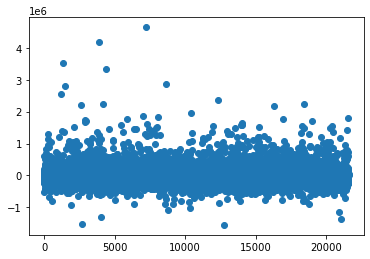

In [41]:
plt.plot((y-y_pred),marker='o',linestyle='');

#### Polynomial Regression

For the linear models, the main idea is to fit a straight line to our data. However, if the data has a quadratic distribution, this time choosing a quadratic function and applying a polynomial regression may give us better results. For this regression coefficients are not the most important factors;we are more interested in how well does the line fit the data points.

In [42]:
# Create polynomial features
pr = PolynomialFeatures(2)
X_train_poly = pr.fit_transform(X_train)
# fit the model to the polynomial features
model_3 = sm.OLS(y,sm.add_constant(X_train_poly))
model_3results = model_3.fit()
model_3results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     227.4
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:11:56   Log-Likelihood:            -2.2961e+05
No. Observations:               17277   AIC:                         4.601e+05
Df Residuals:                   16855   BIC:                         4.633e+05
Df Model:                         421                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.722e+06   9.02e+05      3.018      0.003    9.54e+05    4.49e+06
x1          1.623e+07   3.58e+06      4.536      0.000    9.22e+06    2.32e+07
x2         -1.241e+07   6.16e+06     -2.014      0.044   -2.45e+07   -3.34e+05
x3         -7.937e+04   3.67e+04     -2.165      0.030   -1.51e+05   -7512.139
x4           -52.5230    230.453     -0.228      0.820    -504.235     399.190
x5         -2.662e+07   7.32e+06     -3.639      0.000    -4.1e+07   -1.23e+07
x6          9.833e+04   3.67e+04      2.676      0.007    2.63e+04     1.7e+05
x7          5.421e+04   3.64e+04      1.491      0.136   -1.71e+04    1.25e+05
x8          3.244e+04   1.55e+05      0.209      0.835   -2.72e+05    3.37e+05
x9           3.22e+04   6989.235      4.607      0.000    1.85e+04    4.59e+04
x10        -1.013e+05   4.28e+04     -2.368      0.018   -1.85e+05   -1.74e+04
x11         1.012e+08   1.79e+07      5.651      0.000    6.61e+07    1.36e+08
x12        -4.102e+07    3.4e+07     -1.205      0.228   -1.08e+08    2.57e+07
x13        -6859.7922   6730.934     -1.019      0.308   -2.01e+04    6333.544
x14          340.3359    308.517      1.103      0.270    -264.389     945.061
x15         1.366e+08   2.17e+07      6.301      0.000    9.41e+07    1.79e+08
x16        -1.639e+07   1.31e+07     -1.248      0.212   -4.21e+07    9.35e+06
x17        -3.808e+07   1.14e+07     -3.342      0.001   -6.04e+07   -1.57e+07
x18        -2.363e+07      9e+06     -2.626      0.009   -4.13e+07   -5.99e+06
x19        -1.671e+07   5.64e+06     -2.962      0.003   -2.78e+07   -5.65e+06
x20        -9.033e+06   1.32e+07     -0.686      0.493   -3.49e+07    1.68e+07
x21         1.358e+06   3.08e+06      0.441      0.659   -4.68e+06     7.4e+06
x22         2.103e+06   3.67e+05      5.737      0.000    1.38e+06    2.82e+06
x23         1.424e+06      5e+06      0.285      0.776   -8.38e+06    1.12e+07
x24         -7.47e+07   1.38e+07     -5.420      0.000   -1.02e+08   -4.77e+07
x25         4.935e+06   1.24e+06      3.977      0.000     2.5e+06    7.37e+06
x26        -4247.5652    819.480     -5.183      0.000   -5853.832   -2641.298
x27        -9519.0855   1654.189     -5.755      0.000   -1.28e+04   -6276.702
x28         -8.89e+05   1.24e+05     -7.141      0.000   -1.13e+06   -6.45e+05
x29         5.244e+07   1.51e+07      3.480      0.001    2.29e+07     8.2e+07
x30          4.57e+07   9.97e+06      4.584      0.000    2.62e+07    6.52e+07
x31         4.428e+07   8.55e+06      5.179      0.000    2.75e+07     6.1e+07
x32         3.807e+07   7.76e+06      4.905      0.000    2.29e+07    5.33e+07
x33         1.673e+07   7.69e+06      2.176      0.030    1.66e+06    3.18e+07
x34          650.8039    276.294      2.355      0.019     109.238    1192.370
x35         1975.0462   3358.255      0.588      0.556   -4607.485    8557.577
x3

In [43]:
y_pred = model_3results.predict(sm.add_constant(X_train_poly))
mean_absolute_error(y, y_pred)
mean_squared_error(y, y_pred, squared=False)
print("MAE:", (mean_absolute_error(y, y_pred)))
print("RMSE:", (mean_squared_error(y, y_pred, squared=False)))

MAE: 94379.50273723462
RMSE: 143051.90136788203


The model is statistically significant and explains 84.7% of the variations in price. The model has a lower metric error than our previous model which makes it generally better.

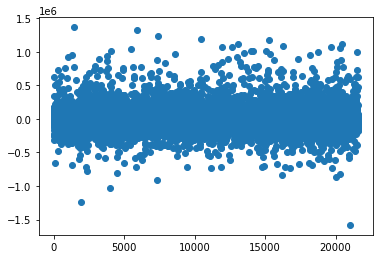

In [44]:
plt.plot((y-y_pred),marker='o',linestyle='');

This model however has many statistically insignificant values thus can be adjusted by only retaining values highly correlated with price.

In [45]:
# Creating and fitting the adjusted model
X_train_poly31 = pr.fit_transform(X_train[set_1])
model_31 = sm.OLS(y,sm.add_constant(X_train_poly31))
model_31results = model_31.fit()
model_31results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     577.4
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:11:58   Log-Likelihood:            -2.3558e+05
No. Observations:               17277   AIC:                         4.713e+05
Df Residuals:                   17206   BIC:                         4.718e+05
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.699e+09    1.8e+08    -26.140      0.000   -5.05e+09   -4.35e+09
x1         -3.269e+04   8.32e+05     -0.039      0.969   -1.66e+06     1.6e+06
x2          3.257e+05    1.2e+06      0.272      0.786   -2.02e+06    2.67e+06
x3         -9184.8890   8541.341     -1.075      0.282   -2.59e+04    7557.009
x4         -1194.1375   8485.661     -0.141      0.888   -1.78e+04    1.54e+04
x5         -9386.7828   8511.775     -1.103      0.270   -2.61e+04    7297.164
x6          1.974e+08   7.57e+06     26.082      0.000    1.83e+08    2.12e+08
x7          -677.5924   1431.098     -0.473      0.636   -3482.689    2127.505
x8         -8.007e+06   3.06e+06     -2.614      0.009    -1.4e+07      -2e+06
x9          3.308e+06   1.13e+06      2.920      0.004    1.09e+06    5.53e+06
x10        -1.031e+07   3.56e+06     -2.896      0.004   -1.73e+07   -3.33e+06
x11         2.121e+06   6.11e+05      3.469      0.001    9.23e+05    3.32e+06
x12          798.5179    276.348      2.890      0.004     256.848    1340.187
x13        -1.029e+04   3849.360     -2.674      0.007   -1.78e+04   -2748.993
x14            3.2957     19.838      0.166      0.868     -35.589      42.180
x15          -13.2509     19.909     -0.666      0.506     -52.275      25.773
x16          -29.2521     19.841     -1.474      0.140     -68.142       9.637
x17          810.1389   1.75e+04      0.046      0.963   -3.35e+04    3.51e+04
x18            8.3134      4.792      1.735      0.083      -1.080      17.707
x19        -4.976e+04   1.64e+04     -3.037      0.002   -8.19e+04   -1.76e+04
x20         5128.3077   7897.764      0.649      0.516   -1.04e+04    2.06e+04
x21         1.521e+04   1.72e+04      0.884      0.377   -1.85e+04    4.89e+04
x22         3795.7539   5041.928      0.753      0.452   -6086.938    1.37e+04
x23         8488.1317   4173.937      2.034      0.042     306.790    1.67e+04
x24           37.1285     44.949      0.826      0.409     -50.975     125.232
x25          -23.0074     44.844     -0.513      0.608    -110.906      64.891
x26           -0.9549     44.725     -0.021      0.983     -88.621      86.711
x27        -6607.3663   2.52e+04     -0.262      0.793    -5.6e+04    4.28e+04
x28          -22.3461      6.798     -3.287      0.001     -35.671      -9.021
x29         1.273e+05   2.38e+04      5.342      0.000    8.06e+04    1.74e+05
x30         2.772e+04   1.16e+04      2.387      0.017    4958.462    5.05e+04
x31         1.945e+04    2.2e+04      0.883      0.377   -2.37e+04    6.26e+04
x32        -3.334e+04   7163.748     -4.654      0.000   -4.74e+04   -1.93e+04
x33           -0.0885      0.052     -1.696      0.090      -0.191       0.014
x34            0.2055      0.131      1.565      0.118      -0.052       0.463
x35           -1.4475      1.044     -1.387      0.166      -3.493       0.598
x3

In [46]:
y_pred = model_31results.predict(sm.add_constant(X_train_poly31))
mean_absolute_error(y, y_pred)
mean_squared_error(y, y_pred, squared=False)
print("MAE:", (mean_absolute_error(y, y_pred)))
print("RMSE:", (mean_squared_error(y, y_pred, squared=False)))

MAE: 123026.1348176965
RMSE: 202044.81511159314


The model is statistically significant with an adjusted R of 70% which is lower than the previous 84% of he polynomial model but higher than that of the adjusted multiple regression of 63%. The metric error is also higher than the all feature polynomial.

#### 2 Regression Models after Standard Scaling

During preprocessing we used a standard scaler technique to scale our data. We will use this data to run the linear,multiple and polynomial regression and see whether we will get better results.

In [47]:
#Separating features from Target
y2 = scaled['price']
x2 = scaled.drop(['price'],axis=1)
x2.shape
# Splitting data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(x2,y2,test_size= 0.2,random_state=45)
y2 = y_train
x2 = X_train

#### 2.1 Simple Linear Regression

In [48]:
baseline2_model = sm.OLS(y2,sm.add_constant(x2['sqft_living']))
baseline2_results = baseline2_model.fit()
baseline2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 1.686e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:11:58   Log-Likelihood:                -18743.
No. Observations:               17277   AIC:                         3.749e+04
Df Residuals:                   17275   BIC:                         3.751e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0028      0.005      0.506      0.613      -0.008       0.013
sqft_living     0.7044      0.005    129.861      0.000       0.694       0.715
==============================================================================
Omnibus:                    11809.256   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           421006.354
Skew:                           2.816   Prob(JB):                         0.00
Kurtosis:                      26.519   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
y_pred = baseline2_results.predict(sm.add_constant(x2['sqft_living']))
mean_absolute_error(y2, y_pred)
mean_squared_error(y2, y_pred, squared=False)
print("MAE:", (mean_absolute_error(y2, y_pred)))
print("RMSE:", (mean_squared_error(y2, y_pred, squared=False)))

MAE: 0.4741023818506476
RMSE: 0.715996641746923


#### 2.2 Multiple linear Regression

In [50]:
# Creating and fitting the adjusted model
model_std = sm.OLS(y2,sm.add_constant(x2))
model_stdresults = model_std.fit()
model_stdresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     1425.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:11:59   Log-Likelihood:                -13262.
No. Observations:               17277   AIC:                         2.659e+04
Df Residuals:                   17243   BIC:                         2.686e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0002      0.004      0.062      0.950      -0.008       0.008
bedrooms               -0.0503      0.005     -9.767      0.000      -0.060      -0.040
bathrooms               0.0928      0.007     12.668      0.000       0.078       0.107
sqft_living             0.2377      0.047      5.058      0.000       0.146       0.330
sqft_lot                0.0121      0.006      2.051      0.040       0.001       0.024
floors                  0.0400      0.006      6.984      0.000       0.029       0.051
sqft_above              0.0935      0.042      2.202      0.028       0.010       0.177
sqft_basement           0.0469      0.022      2.101      0.036       0.003       0.091
yr_built               -0.1770      0.006    -28.187      0.000      -0.189      -0.165
yr_renovated            0.0363      0.004      8.576      0.000       0.028       0.045
zipcode                -0.0849      0.005    -16.429      0.000      -0.095      -0.075
lat                     0.2321      0.004     53.427      0.000       0.224       0.241
long                   -0.0791      0.005    -14.650      0.000      -0.090      -0.069
sqft_living15           0.0478      0.007      6.881      0.000       0.034       0.061
sqft_lot15             -0.0295      0.006     -4.899      0.000      -0.041      -0.018
waterfront_YES          0.1258      0.005     26.387      0.000       0.116       0.135
view_EXCELLENT          0.0504      0.005      9.484      0.000       0.040       0.061
view_FAIR               0.0145      0.005      3.138      0.002       0.005       0.024
view_GOOD               0.0227      0.005      4.653      0.000       0.013       0.032
view_NONE              -0.0629      0.006    -10.623      0.000      -0.074      -0.051
condition_Fair         -0.0011      0.004     -0.275      0.783      -0.009       0.007
condition_Good          0.0360      0.004      8.087      0.000       0.027       0.045
condition_Poor         -0.0056      0.004     -1.289      0.197      -0.014       0.003
condition_Very Good     0.0526      0.004     12.020      0.000       0.044       0.061
grade_11 Excellent      0.0890      0.005     18.920      0.000       0.080       0.098
grade_12 Luxury         0.1259      0.004     30.400      0.000       0.118       0.134
grade_13 Mansion        0.1269      0.004     29.093      0.000       0.118       0.135
grade_3 Poor           -0.0041      0.004     -1.157      0.247      -0.011       0.003
grade_4 Low            -0.0374      0.005     -8.118      0.000      -0.046      -0.028
grade_5 Fair           -0.1159      0.005    -23.134      0.000      -0.126      -0.106
grade_6 Low Average    -0.3062      0.009    -34.795      0.000      -0.323      -0.289
grade_7 Average        -0.4611      0.012    -37.672      0.000      -0.485      -0.437
gra

In [51]:
y_pred = model_stdresults.predict(sm.add_constant(x2))
mean_absolute_error(y2, y_pred)
mean_squared_error(y2, y_pred, squared=False)
print("MAE:", (mean_absolute_error(y2, y_pred)))
print("RMSE:", (mean_squared_error(y2, y_pred, squared=False)))

MAE: 0.3257847679092284
RMSE: 0.5213475317514051


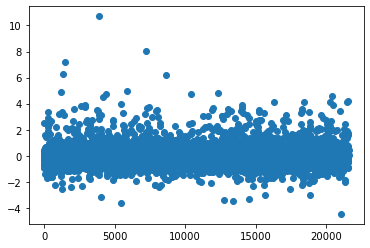

In [52]:
plt.plot((y2-y_pred),marker='o',linestyle='');

In [53]:
# Creating and fitting the adjusted model
model_std2 = sm.OLS(y2,sm.add_constant(x2[set_1]))
model_std2results = model_std2.fit()
model_std2results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     2732.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:11:59   Log-Likelihood:                -15919.
No. Observations:               17277   AIC:                         3.186e+04
Df Residuals:                   17265   BIC:                         3.195e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0012      0.005      0.266      0.790      -0.008       0.010
bedrooms              -0.0810      0.006    -13.947      0.000      -0.092      -0.070
bathrooms              0.0286      0.007      3.965      0.000       0.014       0.043
sqft_living            0.4572      0.054      8.404      0.000       0.351       0.564
sqft_above             0.1056      0.049      2.157      0.031       0.010       0.202
sqft_basement          0.0497      0.026      1.912      0.056      -0.001       0.101
lat                    0.2663      0.005     56.809      0.000       0.257       0.276
sqft_living15          0.0587      0.007      7.881      0.000       0.044       0.073
view_EXCELLENT         0.1353      0.005     27.159      0.000       0.126       0.145
view_NONE             -0.1201      0.005    -22.788      0.000      -0.130      -0.110
grade_11 Excellent     0.1036      0.005     20.632      0.000       0.094       0.113
grade_7 Average       -0.0361      0.005     -7.007      0.000      -0.046      -0.026
==============================================================================
Omnibus:                    14164.481   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1163561.110
Skew:                           3.421   Prob(JB):                         0.00
Kurtosis:                      42.617   Cond. No.                         34.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
y_pred = model_std2results.predict(sm.add_constant(x2[set_1]))
mean_absolute_error(y2, y_pred)
mean_squared_error(y2, y_pred, squared=False)
print("MAE:", (mean_absolute_error(y2, y_pred)))
print("RMSE:", (mean_squared_error(y2, y_pred, squared=False)))

MAE: 0.37657159722108063
RMSE: 0.6080188386226113


#### 2.3 Polynomial Regression

In [55]:
# Create polynomial features
pr = PolynomialFeatures(2)
X_train_polystd = pr.fit_transform(x2)
# fit the model to the polynomial features
model_std3 = sm.OLS(y2,sm.add_constant(X_train_polystd))
model_std3results = model_std3.fit()
model_std3results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     212.7
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:12:04   Log-Likelihood:                -8161.9
No. Observations:               17277   AIC:                         1.723e+04
Df Residuals:                   16823   BIC:                         2.075e+04
Df Model:                         453                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0828      0.026     -3.127      0.002      -0.135      -0.031
x1            -0.0194      0.007     -2.960      0.003      -0.032      -0.007
x2             0.0424      0.013      3.161      0.002       0.016       0.069
x3             0.1886      0.061      3.085      0.002       0.069       0.308
x4             0.0292      0.015      1.959      0.050   -2.12e-05       0.058
x5            -0.0237      0.009     -2.573      0.010      -0.042      -0.006
x6             0.1147      0.055      2.078      0.038       0.006       0.223
x7             0.0228      0.030      0.762      0.446      -0.036       0.082
x8            -0.0678      0.009     -7.824      0.000      -0.085      -0.051
x9            -2.2324      0.460     -4.850      0.000      -3.135      -1.330
x10           -0.1319      0.006    -23.954      0.000      -0.143      -0.121
x11            0.2143      0.004     50.715      0.000       0.206       0.223
x12           -0.1724      0.007    -24.044      0.000      -0.186      -0.158
x13            0.1141      0.008     15.110      0.000       0.099       0.129
x14           -0.0116      0.016     -0.725      0.469      -0.043       0.020
x15            0.0093      0.002      4.195      0.000       0.005       0.014
x16            0.0107      0.003      3.262      0.001       0.004       0.017
x17            0.0102      0.003      3.058      0.002       0.004       0.017
x18            0.0132      0.004      3.161      0.002       0.005       0.021
x19           -0.0320      0.009     -3.722      0.000      -0.049      -0.015
x20            0.0072      0.002      3.068      0.002       0.003       0.012
x21            0.0558      0.013      4.302      0.000       0.030       0.081
x22            0.0033      0.001      3.370      0.001       0.001       0.005
x23            0.0278      0.008      3.699      0.000       0.013       0.043
x24            0.0123      0.004      3.435      0.001       0.005       0.019
x25            0.0053      0.002      3.136      0.002       0.002       0.009
x26            0.0021      0.001      3.341      0.001       0.001       0.003
x27            0.0006      0.000      3.127      0.002       0.000       0.001
x28            0.0025      0.001      2.455      0.014       0.001       0.005
x29            0.0079      0.003      2.828      0.005       0.002       0.013
x30            0.0070      0.008      0.848      0.397      -0.009       0.023
x31           -0.1370      0.014     -9.697      0.000      -0.165      -0.109
x32           -0.0017      0.014     -0.124      0.901      -0.029       0.025
x33            0.0261      0.009      2.812      0.005       0.008       0.044
x34            0.0016      0.001      2.532      0.011       0.000       0.003
x35            0.0042      0.006      0.639      0.523      -0.009       0.017
x3

In [56]:
y_pred = model_std3results.predict(sm.add_constant(X_train_polystd))
mean_absolute_error(y2, y_pred)
mean_squared_error(y2, y_pred, squared=False)
print("MAE:", (mean_absolute_error(y2, y_pred)))
print("RMSE:", (mean_squared_error(y2, y_pred, squared=False)))

MAE: 0.2560357799191563
RMSE: 0.38808788955725676


In [57]:
# Creating and fitting the adjusted model
X_train_polystd = pr.fit_transform(x2[set_1])
model_std31 = sm.OLS(y2,sm.add_constant(X_train_polystd))
model_std31results = model_std31.fit()
model_std31results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     577.4
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:12:05   Log-Likelihood:                -14186.
No. Observations:               17277   AIC:                         2.851e+04
Df Residuals:                   17206   BIC:                         2.906e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0062      0.004     -1.411      0.158      -0.015       0.002
x1            -0.0340      0.006     -5.636      0.000      -0.046      -0.022
x2             0.0365      0.007      5.155      0.000       0.023       0.050
x3             0.3577      0.071      5.070      0.000       0.219       0.496
x4             0.0127      0.063      0.201      0.841      -0.111       0.137
x5             0.0270      0.035      0.776      0.438      -0.041       0.095
x6             0.2227      0.005     46.406      0.000       0.213       0.232
x7             0.0973      0.008     12.081      0.000       0.082       0.113
x8             0.0021      0.001      3.785      0.000       0.001       0.003
x9            -0.0123      0.002     -7.225      0.000      -0.016      -0.009
x10            0.0031      0.001      4.602      0.000       0.002       0.004
x11           -0.0656      0.005    -12.622      0.000      -0.076      -0.055
x12            0.0019      0.001      2.890      0.004       0.001       0.003
x13           -0.0200      0.007     -2.674      0.007      -0.035      -0.005
x14            0.0076      0.046      0.166      0.868      -0.082       0.098
x15           -0.0277      0.042     -0.666      0.506      -0.109       0.054
x16           -0.0324      0.022     -1.474      0.140      -0.076       0.011
x17            0.0003      0.006      0.046      0.963      -0.012       0.012
x18            0.0144      0.008      1.735      0.083      -0.002       0.031
x19           -0.0151      0.005     -3.037      0.002      -0.025      -0.005
x20            0.0038      0.006      0.649      0.516      -0.008       0.015
x21            0.0052      0.006      0.884      0.377      -0.006       0.017
x22            0.0047      0.006      0.753      0.452      -0.008       0.017
x23            0.0137      0.007      2.034      0.042       0.000       0.027
x24            0.0714      0.086      0.826      0.409      -0.098       0.241
x25           -0.0399      0.078     -0.513      0.608      -0.192       0.112
x26           -0.0009      0.041     -0.021      0.983      -0.082       0.080
x27           -0.0019      0.007     -0.262      0.793      -0.016       0.012
x28           -0.0321      0.010     -3.287      0.001      -0.051      -0.013
x29            0.0321      0.006      5.342      0.000       0.020       0.044
x30            0.0172      0.007      2.387      0.017       0.003       0.031
x31            0.0055      0.006      0.883      0.377      -0.007       0.018
x32           -0.0344      0.007     -4.654      0.000      -0.049      -0.020
x33           -0.2031      0.120     -1.696      0.090      -0.438       0.032
x34            0.4250      0.272      1.565      0.118      -0.107       0.957
x35           -0.0929      0.055     -1.686      0.092      -0.201       0.015
x3

In [58]:
y_pred = model_std31results.predict(sm.add_constant(X_train_polystd))
mean_absolute_error(y2, y_pred)
mean_squared_error(y2, y_pred, squared=False)
print("MAE:", (mean_absolute_error(y2, y_pred)))
print("RMSE:", (mean_squared_error(y2, y_pred, squared=False)))

MAE: 0.33489292837811163
RMSE: 0.5499918768983412


In [65]:
#lets try to drop the location parameters and parameers we suspect to be unnecesary
x2_drop = x2.drop(['zipcode','lat','long','yr_renovated','yr_built'],axis=1)

In [62]:
pr = PolynomialFeatures(2)
X_train_polystd2 = pr.fit_transform(x2_drop)
# fit the model to the polynomial features
model_std3 = sm.OLS(y2,sm.add_constant(X_train_polystd2))
model_std3results = model_std3.fit()
model_std3results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     153.0
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:14:52   Log-Likelihood:                -13232.
No. Observations:               17277   AIC:                         2.707e+04
Df Residuals:                   16972   BIC:                         2.944e+04
Df Model:                         304                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0667      0.009      7.146      0.000       0.048       0.085
x1            -0.0249      0.006     -4.092      0.000      -0.037      -0.013
x2            -0.0242      0.008     -3.025      0.002      -0.040      -0.009
x3             0.3937      0.078      5.032      0.000       0.240       0.547
x4            -0.0457      0.016     -2.858      0.004      -0.077      -0.014
x5             0.0365      0.008      4.589      0.000       0.021       0.052
x6            -0.1222      0.070     -1.737      0.082      -0.260       0.016
x7             0.0334      0.039      0.865      0.387      -0.042       0.109
x8             0.1023      0.008     12.392      0.000       0.086       0.119
x9            -0.1098      0.016     -7.054      0.000      -0.140      -0.079
x10           -0.0035      0.001     -4.093      0.000      -0.005      -0.002
x11           -0.0076      0.001     -6.532      0.000      -0.010      -0.005
x12           -0.0084      0.001     -7.145      0.000      -0.011      -0.006
x13           -0.0103      0.001     -6.937      0.000      -0.013      -0.007
x14            0.0151      0.003      4.763      0.000       0.009       0.021
x15           -0.0060      0.001     -7.228      0.000      -0.008      -0.004
x16            0.0011      0.005      0.211      0.833      -0.009       0.011
x17           -0.0024      0.000     -6.999      0.000      -0.003      -0.002
x18           -0.0085      0.003     -3.164      0.002      -0.014      -0.003
x19           -0.0066      0.001     -4.969      0.000      -0.009      -0.004
x20           -0.0038      0.001     -6.383      0.000      -0.005      -0.003
x21           -0.0015      0.000     -6.458      0.000      -0.002      -0.001
x22           -0.0005   6.36e-05     -7.150      0.000      -0.001      -0.000
x23           -0.0025      0.000     -7.130      0.000      -0.003      -0.002
x24           -0.0082      0.001     -7.838      0.000      -0.010      -0.006
x25           -0.0446      0.004    -11.222      0.000      -0.052      -0.037
x26           -0.2431      0.015    -15.712      0.000      -0.273      -0.213
x27           -0.0943      0.010     -9.434      0.000      -0.114      -0.075
x28           -0.0289      0.005     -6.209      0.000      -0.038      -0.020
x29            0.0042      0.001      5.126      0.000       0.003       0.006
x30           -0.0100      0.008     -1.230      0.219      -0.026       0.006
x31           -0.0631      0.051     -1.226      0.220      -0.164       0.038
x32            0.0156      0.011      1.463      0.143      -0.005       0.037
x33            0.0375      0.008      4.725      0.000       0.022       0.053
x34            0.0577      0.047      1.233      0.218      -0.034       0.150
x35            0.0281      0.025      1.145      0.252      -0.020       0.076
x3

In [64]:
y_pred = model_std3results.predict(sm.add_constant(X_train_polystd2))
mean_absolute_error(y2, y_pred)
mean_squared_error(y2, y_pred, squared=False)
print("MAE:", (mean_absolute_error(y2, y_pred)))
print("RMSE:", (mean_squared_error(y2, y_pred, squared=False)))

MAE: 0.35687757962844313
RMSE: 0.5204581117405216


#### Interpretation of Standardized Results

From the models above, the adjusted rsquared(s) are equal to those of our original models before standardization. 

####  3 Regression Models after Log Transformation

In [55]:
#Separating features from Target
y3 = data_copy['price']
x3 = data_copy.drop(['price'],axis=1)
# Splitting data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(x3,y3,test_size= 0.2,random_state=45)
X_train = x3
y_train = y3

#### 3.1 Simple Linear Regression

In [56]:
# Creating and fitting the model
baseline3_model = sm.OLS(y3,sm.add_constant(x3['log_sqft_living']))
baseline3_results = baseline3_model.fit()
baseline3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                 1.292e+04
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:34:57   Log-Likelihood:            -3.0233e+05
No. Observations:               21597   AIC:                         6.047e+05
Df Residuals:                   21595   BIC:                         6.047e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.461e+06   3.53e+04    -98.165      0.000   -3.53e+06   -3.39e+06
log_sqft_living  5.299e+05   4661.551    113.670      0.000    5.21e+05    5.39e+05
==============================================================================
Omnibus:                    19384.826   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1655521.719
Skew:                           3.977   Prob(JB):                         0.00
Kurtosis:                      45.148   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The rsquared is very low. Lets try to log transform the target and predictor variables.

In [57]:
# Creating and fitting the model
baseline3_model = sm.OLS((np.log(y3)),sm.add_constant(x3['log_sqft_living']))
baseline3_results = baseline3_model.fit()
baseline3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:34:57   Log-Likelihood:                -10231.
No. Observations:               21597   AIC:                         2.047e+04
Df Residuals:                   21595   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.7234      0.047    142.612      0.000       6.631       6.816
log_sqft_living     0.8376      0.006    134.368      0.000       0.825       0.850
==============================================================================
Omnibus:                      123.577   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.096
Skew:                           0.143   Prob(JB):                     1.68e-25
Kurtosis:                       2.787   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3.2 Multiple Linear Regression

For better results,we log transform the square feet measurements.

In [58]:
model_log = sm.OLS(y3,sm.add_constant(x3))
model_logresults = model_log.fit()
model_logresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     1731.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:34:57   Log-Likelihood:            -2.9341e+05
No. Observations:               21597   AIC:                         5.869e+05
Df Residuals:                   21563   BIC:                         5.872e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8.883e+06   2.89e+06      3.072      0.002    3.22e+06    1.45e+07
bedrooms            -1.232e+04   1891.303     -6.512      0.000    -1.6e+04   -8609.773
bathrooms            5.827e+04   3135.633     18.584      0.000    5.21e+04    6.44e+04
floors               7677.4935   3815.241      2.012      0.044     199.338    1.52e+04
sqft_basement         201.6900      8.003     25.202      0.000     186.004     217.377
yr_built            -2276.7093     70.731    -32.188      0.000   -2415.347   -2138.071
yr_renovated           35.1930      3.828      9.194      0.000      27.690      42.696
zipcode              -549.1412     31.841    -17.246      0.000    -611.553    -486.730
lat                  6.073e+05   1.04e+04     58.649      0.000    5.87e+05    6.28e+05
long                -1.614e+05   1.28e+04    -12.574      0.000   -1.87e+05   -1.36e+05
waterfront_YES        5.75e+05   1.96e+04     29.404      0.000    5.37e+05    6.13e+05
view_EXCELLENT       1.694e+05   1.46e+04     11.567      0.000    1.41e+05    1.98e+05
view_FAIR            4.486e+04   1.23e+04      3.643      0.000    2.07e+04     6.9e+04
view_GOOD            5.655e+04   1.06e+04      5.322      0.000    3.57e+04    7.74e+04
view_NONE           -7.078e+04   6591.339    -10.738      0.000   -8.37e+04   -5.79e+04
condition_Fair      -4444.7002    1.5e+04     -0.295      0.768   -3.39e+04    2.51e+04
condition_Good       3.234e+04   3349.858      9.653      0.000    2.58e+04    3.89e+04
condition_Poor       -7.28e+04   3.61e+04     -2.015      0.044   -1.44e+05   -1987.623
condition_Very Good  7.343e+04   5331.910     13.771      0.000     6.3e+04    8.39e+04
grade_11 Excellent   2.988e+05   1.13e+04     26.378      0.000    2.77e+05    3.21e+05
grade_12 Luxury      8.185e+05   2.16e+04     37.947      0.000    7.76e+05    8.61e+05
grade_13 Mansion     2.105e+06   5.44e+04     38.722      0.000       2e+06    2.21e+06
grade_3 Poor        -2.406e+05   1.93e+05     -1.247      0.213   -6.19e+05    1.38e+05
grade_4 Low         -4.246e+05   3.87e+04    -10.976      0.000      -5e+05   -3.49e+05
grade_5 Fair        -4.566e+05   1.58e+04    -28.954      0.000   -4.87e+05   -4.26e+05
grade_6 Low Average -4.358e+05   9815.783    -44.400      0.000   -4.55e+05   -4.17e+05
grade_7 Average     -4.061e+05   7784.855    -52.165      0.000   -4.21e+05   -3.91e+05
grade_8 Good        -3.466e+05   6954.181    -49.843      0.000    -3.6e+05   -3.33e+05
grade_9 Better      -1.985e+05   6986.921    -28.417      0.000   -2.12e+05   -1.85e+05
log_sqft_living     -2.226e+05   1.68e+04    -13.257      0.000   -2.55e+05    -1.9e+05
log_sqft_lot         -872.4063   3843.143     -0.227      0.820   -8405.251    6660.438
log_sqft_above       3.852e+05   1.54e+04     25.092      0.000    3.55e+05    4.15e+05
log

In [59]:
y_pred = model_logresults.predict(sm.add_constant(x3))
mean_absolute_error(y3, y_pred)
mean_squared_error(y3, y_pred, squared=False)
print("MAE:", (mean_absolute_error(y3, y_pred)))
print("RMSE:", (mean_squared_error(y3, y_pred, squared=False)))

MAE: 119571.60173703816
RMSE: 192288.9170403147


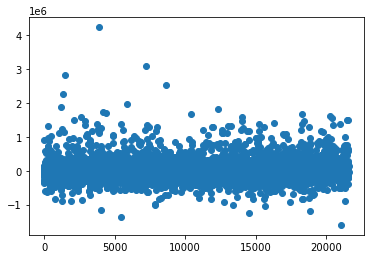

In [60]:
plt.plot((y-y_pred),marker='o',linestyle='');

In [61]:
# Removing unnecessary features
set_1 = list(data_copy.corr()[abs(data_copy.corr()['price'])>0.3].index)
set_1.remove('price')
set_1

['bedrooms',
 'bathrooms',
 'sqft_basement',
 'lat',
 'view_EXCELLENT',
 'view_NONE',
 'grade_11 Excellent',
 'grade_7 Average',
 'log_sqft_living',
 'log_sqft_above',
 'log_sqft_living15']

In [62]:
model_log2 = sm.OLS(y3,sm.add_constant(x3[set_1]))
model_log2results = model_log2.fit()
model_log2results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     2932.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:34:58   Log-Likelihood:            -2.9752e+05
No. Observations:               21597   AIC:                         5.951e+05
Df Residuals:                   21585   BIC:                         5.952e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.667e+07    5.5e+05    -66.619      0.000   -3.77e+07   -3.56e+07
bedrooms           -2.068e+04   2234.526     -9.253      0.000   -2.51e+04   -1.63e+04
bathrooms           4.771e+04   3246.003     14.697      0.000    4.13e+04    5.41e+04
sqft_basement        324.7486      9.438     34.407      0.000     306.249     343.249
lat                 7.252e+05   1.15e+04     62.808      0.000    7.03e+05    7.48e+05
view_EXCELLENT      4.408e+05   1.43e+04     30.909      0.000    4.13e+05    4.69e+05
view_NONE          -1.466e+05   6062.564    -24.183      0.000   -1.58e+05   -1.35e+05
grade_11 Excellent  4.226e+05   1.24e+04     34.137      0.000    3.98e+05    4.47e+05
grade_7 Average    -4.276e+04   3558.753    -12.015      0.000   -4.97e+04   -3.58e+04
log_sqft_living    -3.356e+05   1.98e+04    -16.984      0.000   -3.74e+05   -2.97e+05
log_sqft_above      5.983e+05   1.77e+04     33.861      0.000    5.64e+05    6.33e+05
log_sqft_living15   1.114e+05   7630.195     14.595      0.000    9.64e+04    1.26e+05
==============================================================================
Omnibus:                    19791.091   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2356374.527
Skew:                           3.994   Prob(JB):                         0.00
Kurtosis:                      53.544   Cond. No.                     1.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our model is still not at its best. Lets check for multicollinearity and drop the strongly correlated independent variables.

In [63]:
# Check for multicollinearity
set_1_data = data_copy.loc[:,set_1]
set_1_data.corr()

,bedrooms,bathrooms,sqft_basement,lat,view_EXCELLENT,view_NONE,grade_11 Excellent,grade_7 Average,log_sqft_living,log_sqft_above,log_sqft_living15
bedrooms,1.000000,0.514508,0.297229,-0.009951,0.033127,-0.079232,0.116596,-0.104791,0.621820,0.516072,0.406631
bathrooms,0.514508,1.000000,0.278485,0.024280,0.105789,-0.175884,0.247293,-0.313457,0.762135,0.695839,0.571796
sqft_basement,0.297229,0.278485,1.000000,0.109853,0.148914,-0.268578,0.076299,-0.019855,0.417212,-0.050290,0.204563
lat,-0.009951,0.024280,0.109853,1.000000,0.013935,-0.009509,0.039372,-0.040532,0.038820,-0.019124,0.043601
view_EXCELLENT,0.033127,0.105789,0.148914,0.013935,1.000000,-0.370721,0.080468,-0.078690,0.134286,0.094176,0.138902
view_NONE,-0.079232,-0.175884,-0.268578,-0.009509,-0.370721,1.000000,-0.134261,0.143475,-0.237826,-0.145285,-0.259814
grade_11 Excellent,0.116596,0.247293,0.076299,0.039372,0.080468,-0.134261,1.000000,-0.115678,0.263288,0.267856,0.253131
grade_7 Average,-0.104791,-0.313457,-0.019855,-0.040532,-0.078690,0.143475,-0.115678,1.000000,-0.323145,-0.370330,-0.355972
log_sqft_living,0.621820,0.762135,0.417212,0.038820,0.134286,-0.237826,0.263288,-0.323145,1.000000,0.864979,0.746836
log_sqft_above,0.516072,0.695839,-0.050290,-0.019124,0.094176,-0.145285,0.267856,-0.370330,0.864979,1.000000,0.713102


In [64]:
# Get pairs of highly correlated variables
df = set_1_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc>.5) & (df.cc<1)]

,cc
pairs,
"(log_sqft_living, log_sqft_above)",0.864979
"(log_sqft_living, bathrooms)",0.762135
"(log_sqft_living15, log_sqft_living)",0.746836
"(log_sqft_living15, log_sqft_above)",0.713102
"(bathrooms, log_sqft_above)",0.695839
"(bedrooms, log_sqft_living)",0.621820
"(bathrooms, log_sqft_living15)",0.571796
"(log_sqft_above, bedrooms)",0.516072
"(bedrooms, bathrooms)",0.514508


In [65]:
X_train_scaled =X_train[set_1].drop(['log_sqft_above','bathrooms','log_sqft_living15'],axis = 1)

In [66]:
model_3 = sm.OLS(y_train,sm.add_constant(X_train_scaled))
model_3_results = model_3.fit()
model_3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     3531.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:34:59   Log-Likelihood:            -2.9836e+05
No. Observations:               21597   AIC:                         5.967e+05
Df Residuals:                   21588   BIC:                         5.968e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.644e+07   5.71e+05    -63.781      0.000   -3.76e+07   -3.53e+07
bedrooms            -1.81e+04   2305.544     -7.849      0.000   -2.26e+04   -1.36e+04
sqft_basement         21.9825      4.287      5.128      0.000      13.580      30.385
lat                 7.156e+05    1.2e+04     59.707      0.000    6.92e+05    7.39e+05
view_EXCELLENT      4.838e+05   1.48e+04     32.736      0.000    4.55e+05    5.13e+05
view_NONE          -1.703e+05   6238.533    -27.295      0.000   -1.83e+05   -1.58e+05
grade_11 Excellent  4.904e+05   1.28e+04     38.460      0.000    4.65e+05    5.15e+05
grade_7 Average    -7.421e+04   3606.154    -20.580      0.000   -8.13e+04   -6.71e+04
log_sqft_living     4.202e+05   5753.595     73.039      0.000    4.09e+05    4.32e+05
==============================================================================
Omnibus:                    22055.890   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3876406.332
Skew:                           4.685   Prob(JB):                         0.00
Kurtosis:                      67.961   Cond. No.                     1.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Creating a prediction based on the chosen model

The best model for the house price prediction is the polynomial regression for all features as it has the highest adjusted r(84.7) alongside the lowest metric error. Lets use the test data to affirm the choice made.

In [67]:
#Separating features from Target
y4 = scaled['price']
x4 = scaled.drop(['price'],axis=1)
# Splitting data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(x4,y4,test_size= 0.2,random_state=45)
y4 = y_test
x4 = X_test

In [70]:
# Create polynomial features
pr = PolynomialFeatures(2)
X_test_poly = pr.fit_transform(x4)
# fit the model to the polynomial features
model_pred = sm.OLS(y4,sm.add_constant(X_test_poly))
model_pred_results = model_pred.fit()
model_pred_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     70.65
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:18:28   Log-Likelihood:                -1403.5
No. Observations:                4320   AIC:                             3633.
Df Residuals:                    3907   BIC:                             6264.
Df Model:                         412                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0403      0.049      0.828      0.408      -0.055       0.136
x1            -0.0167      0.009     -1.788      0.074      -0.035       0.002
x2             0.0420      0.013      3.284      0.001       0.017       0.067
x3             0.2746      0.247      1.112      0.266      -0.210       0.759
x4             0.0910      0.038      2.416      0.016       0.017       0.165
x5            -0.0178      0.013     -1.346      0.178      -0.044       0.008
x6             0.0315      0.221      0.143      0.886      -0.401       0.465
x7            -0.0076      0.120     -0.063      0.950      -0.243       0.228
x8            -0.0705      0.015     -4.584      0.000      -0.101      -0.040
x9            -0.0750      0.828     -0.091      0.928      -1.699       1.549
x10           -0.1422      0.011    -13.503      0.000      -0.163      -0.122
x11            0.2179      0.008     26.299      0.000       0.202       0.234
x12           -0.1315      0.012    -10.523      0.000      -0.156      -0.107
x13            0.1096      0.013      8.451      0.000       0.084       0.135
x14           -0.0425      0.035     -1.198      0.231      -0.112       0.027
x15           -0.0038      0.005     -0.809      0.419      -0.013       0.005
x16           -0.0041      0.006     -0.681      0.496      -0.016       0.008
x17           -0.0041      0.006     -0.668      0.504      -0.016       0.008
x18           -0.0065      0.008     -0.847      0.397      -0.022       0.009
x19            0.0098      0.016      0.623      0.533      -0.021       0.041
x20           -0.0038      0.004     -0.857      0.392      -0.012       0.005
x21           -0.0043      0.024     -0.179      0.858      -0.051       0.042
x22           -0.0014      0.002     -0.798      0.425      -0.005       0.002
x23           -0.0062      0.014     -0.451      0.652      -0.033       0.021
x24           -0.0059      0.007     -0.889      0.374      -0.019       0.007
x25           -0.0023      0.003     -0.752      0.452      -0.008       0.004
x26           -0.0010      0.001     -0.805      0.421      -0.003       0.001
x27           -0.0003      0.000     -0.828      0.408      -0.001       0.000
x28           -0.0014      0.002     -0.838      0.402      -0.005       0.002
x29           -0.0045      0.005     -0.859      0.390      -0.015       0.006
x30           -0.0289      0.015     -1.890      0.059      -0.059       0.001
x31           -0.1766      0.028     -6.295      0.000      -0.232      -0.122
x32           -0.0566      0.026     -2.148      0.032      -0.108      -0.005
x33           -0.0132      0.017     -0.769      0.442      -0.047       0.020
x34           -0.0002      0.006     -0.029      0.977      -0.012       0.012
x35            0.0130      0.014      0.950      0.342      -0.014       0.040
x3

In [71]:
y_pred = model_pred_results.predict(sm.add_constant(X_test_poly))
mean_absolute_error(y4, y_pred)
mean_squared_error(y4, y_pred, squared=False)
print("MAE:", (mean_absolute_error(y4, y_pred)))
print("RMSE:", (mean_squared_error(y4, y_pred, squared=False)))

MAE: 0.2323811853308731
RMSE: 0.334859556338286


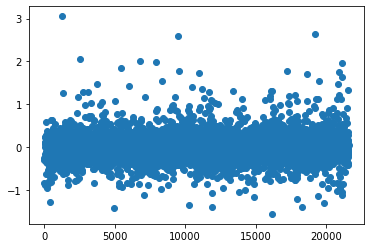

In [72]:
# Plot the error
plt.plot((y_test-y_pred),marker='o',linestyle='');

There is not a great different between Train Mean Squared Error(0.2560) and Test Mean Squared Error(0.2324) therefore we have not overfitted our model and it is okay. This means that our model will perform in a similar way on different data.

#### Summary

The analysis has explored the linear,multiple and polynomial regression in different angles to ensure that the right conclusions are made. The three are repeated before and after preprocessing of data.The scaling techniques used for preprocessing were log transformation and the sklearn standard scaler. The models had adjusted rscores as high as ~85 and means of absolute error as low as 0.2560.
The main metrics of success for the analysis were: the Rsquared,mean absolute error and the Root Mean Square Error.

#### Conclusion

Several factors had a significant influence on price that is: Square footage of (the living space,the lot,the basement and Square footage of house apart from basement,the year the house was built and when it was renovated,the grade of the house in terms of in terms of the construction and design of the house,location,the number of bedrooms and bathrooms a house has.
When only highly correlated features with price are used the model performance drops.
Waterfronts and views barely impact price,on the contrary houses with neither had very high prices.